In [1]:
# Import necessary libraries
import pandas as pd


In [2]:
data = pd.read_csv('/Users/user/Downloads/churn-bigml-20.csv')

In [3]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

In [4]:
# Load data for cleaning

data = "/Users/user/Downloads/churn-bigml-20.csv" 

def load_and_clean_dataset(data):
    # Load the dataset
    try:
        data = pd.read_csv(data)
    except FileNotFoundError:
        print("File not found. Please check the data.")
        return None
    except Exception as e:
        print("An error occurred while loading the dataset:", e)
        return None

    # Data cleaning steps
      
    # Remove duplicate rows
    data = data.drop_duplicates()

    # Handle missing values
    data = data.dropna()

    # Perform other cleaning operations as required

    return data






file_path = "/Users/user/Downloads/churn-bigml-20.csv"  #  dataset file path
cleaned_df = load_and_clean_dataset(data)

# Check if the dataset is loaded and cleaned successfully
if cleaned_df is not None:
    print("Dataset loaded and cleaned successfully.")
    # Save the cleaned dataset to a new CSV file
    cleaned_data = "cleaned_dataset.csv"  # Change this to the desired file path
    cleaned_df.to_csv(cleaned_data, index=False)
    print("Cleaned dataset saved to:", cleaned_data)
else:
    print("Failed to load or clean the dataset.")




Dataset loaded and cleaned successfully.
Cleaned dataset saved to: cleaned_dataset.csv


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
# Load cleaned dataset
import pandas as pd
cleaned_dataset = pd.read_csv('/Users/user/cleaned_dataset.csv')

In [7]:
print(cleaned_dataset)

    State  Account length  Area code International plan Voice mail plan  \
0      LA             117        408                 No              No   
1      IN              65        415                 No              No   
2      NY             161        415                 No              No   
3      SC             111        415                 No              No   
4      HI              49        510                 No              No   
..    ...             ...        ...                ...             ...   
662    WI             114        415                 No             Yes   
663    AL             106        408                 No             Yes   
664    VT              60        415                 No              No   
665    WV             159        415                 No              No   
666    CT             184        510                Yes              No   

     Number vmail messages  Total day minutes  Total day calls  \
0                        0       

In [10]:
from sklearn.preprocessing import LabelEncoder
# Step 3: Split the data into training and testing sets
X = cleaned_dataset.drop('Total intl charge', axis=1)  # Features
y = cleaned_dataset['Total intl charge']  # Target variable

from sklearn.preprocessing import LabelEncoder

# Assuming 'cleaned_dataset' and 'data' are DataFrames
categorical_cols = cleaned_dataset.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
  # Encode the column in 'cleaned_dataset' using the encoder fit on data from the same column
  cleaned_dataset[col] = label_encoder.fit_transform(cleaned_dataset[col])

# ... rest of your code (one-hot encoding, etc.)


# Convert categorical variables into dummy/indicator variables (one-hot encoding)
cleaned_dataset = pd.get_dummies(cleaned_dataset)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 4: Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Step 5: Evaluate the model's performance using relevant metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8.630576294646724e-06
R-squared: 0.9999864732809061


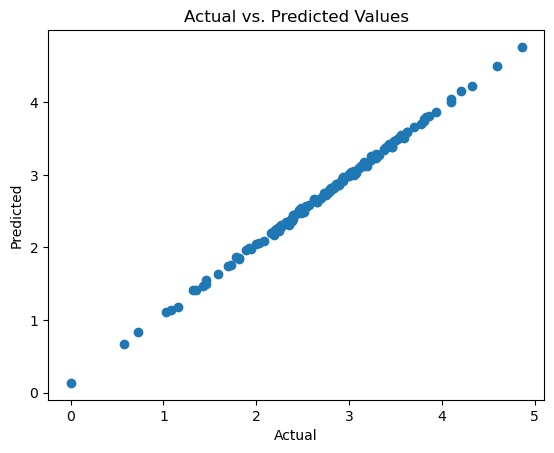

In [24]:
# Visualization:
# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.show()

In [17]:
# Model Optimization
# Load necessary Libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [18]:
# Define a list of models to experiment with
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

In [19]:
# Define hyperparameter grids for each model
param_grids = {
    'Linear Regression': {'fit_intercept': [True, False]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

In [20]:
# Initialize an empty dictionary to store the best models
best_models = {}

In [22]:
# Iterate over models
for name, model in models.items():
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_models[name] = grid_search.best_estimator_

In [35]:
# Evaluate the best models on the testing data
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error:", mse)

Linear Regression Mean Squared Error: 8.630576294646724e-06
Random Forest Mean Squared Error: 0.001283544626865675
Support Vector Machine Mean Squared Error: 0.0018993392580334602


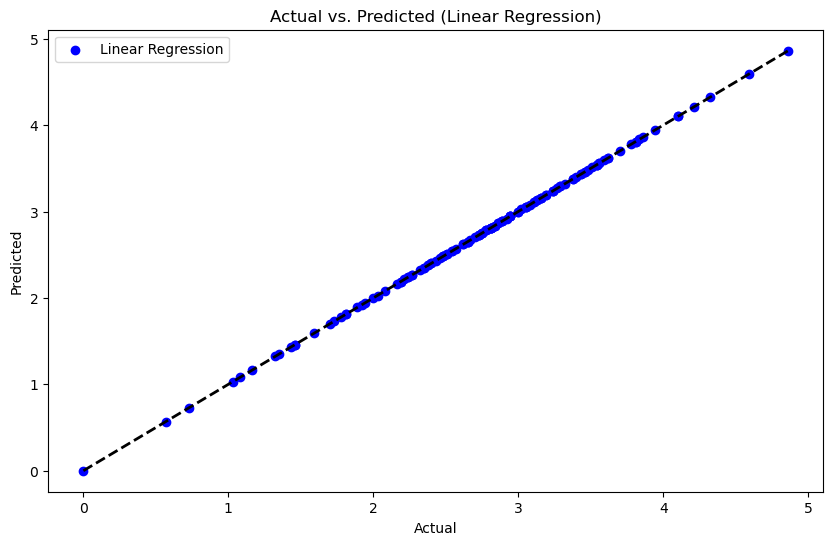

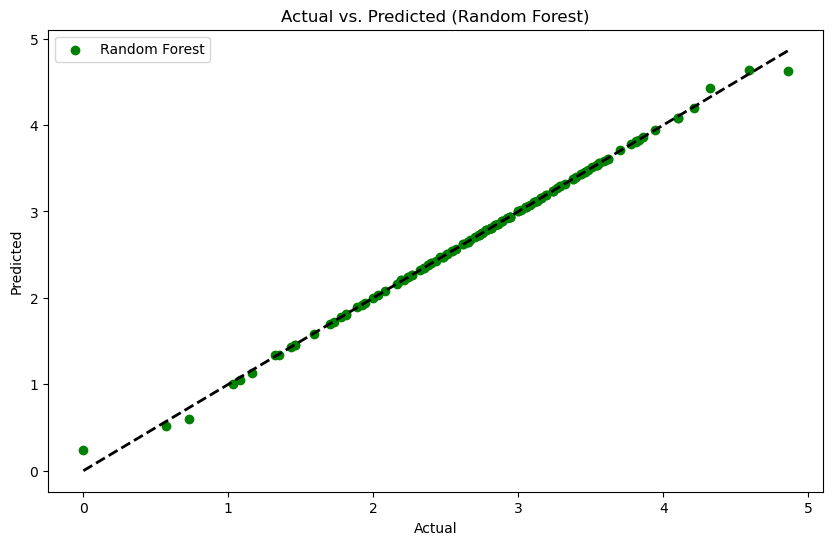

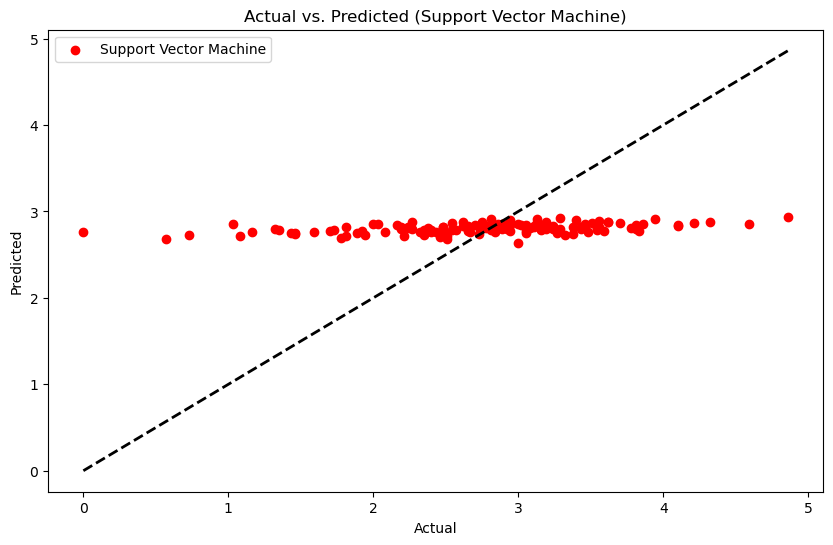

In [40]:
def make_linear_regression_predictions(X_test):
  # Create and train a linear regression model (replace with your actual training code)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred_linear = model.predict(X_test)
  return y_pred_linear

def make_random_forest_predictions(X_test):
  # Create and train a random forest model (replace with your actual training code)
  model = RandomForestRegressor()
  model.fit(X_train, y_train)
  y_pred_rf = model.predict(X_test)
  return y_pred_rf

def make_support_vector_machine_predictions(X_test):
  # Create and train a support vector machine model (replace with your actual training code)
  model = SVR()
  model.fit(X_train, y_train)
  y_pred_svm = model.predict(X_test)
  return y_pred_svm

# code (using the defined functions to make predictions)

# code for training models (replace with your actual functions)
y_pred_linear = make_linear_regression_predictions(X_test)
y_pred_rf = make_random_forest_predictions(X_test)
y_pred_svm = make_support_vector_machine_predictions(X_test)

# code (including the loop using the defined variables)

def plot_actual_vs_predicted(y_test, y_pred_linear, y_pred_rf, y_pred_svm):
  models = [('Linear Regression', 'blue', y_pred_linear),
             ('Random Forest', 'green', y_pred_rf),
             ('Support Vector Machine', 'red', y_pred_svm)]

  # The plotting code within the function (using the arguments)

# Call the function with the predictions
plot_actual_vs_predicted(y_test, y_pred_linear, y_pred_rf, y_pred_svm)


models = [('Linear Regression', 'blue', y_pred_linear),
         ('Random Forest', 'green', y_pred_rf),
         ('Support Vector Machine', 'red', y_pred_svm)]

for name, color, y_pred in models:
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, color=color, label=name)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title(f'Actual vs. Predicted ({name})')
  plt.legend()
  plt.show()
